In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [82]:

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [83]:
train_data.fillna(method='ffill',inplace=True)
test_data.fillna(method='ffill',inplace=True)

In [84]:
numeric=train_data.select_dtypes(include=['number']).columns
categorical=train_data.select_dtypes(include=['object']).columns

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [86]:
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


In [87]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)


In [88]:
pre=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric),
        ('cat',categorical_transformer,categorical)
    ])


In [89]:
numeric_transformed=numeric_transformer.fit_transform(train_data[numeric])

In [90]:
X=train_data.drop('SalePrice',axis=1)
y=train_data['SalePrice']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
knn=KNeighborsRegressor(n_neighbors=5)

In [93]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [94]:
y_pr=knn.predict(X_test)


In [97]:
mean_sq_error=mean_squared_error(y_test,y_pr)
print(f'Mean Squared Error:{mean_sq_error}')

Mean Squared Error:2359494795.9552054


In [98]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)

In [102]:
train_data['cluster']=kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
cluster_m=train_data.groupby('cluster')['SalePrice'].mean()
print(cluster_m)

cluster
0    179041.565004
1    295737.500000
2    248056.030303
Name: SalePrice, dtype: float64


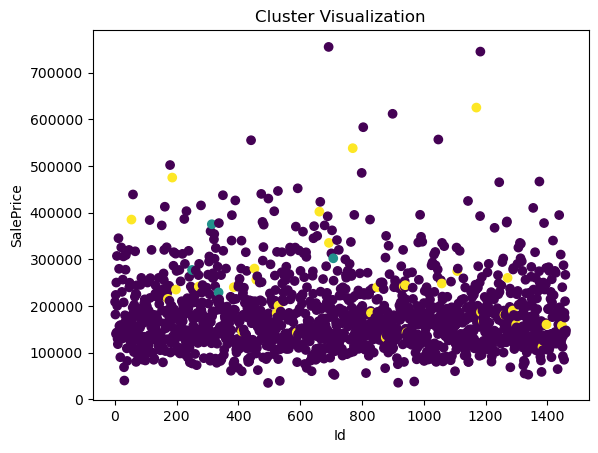

In [104]:
import matplotlib.pyplot as plt
plt.scatter(train_data['Id'],train_data['SalePrice'],c=train_data['cluster'],cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.show()

In [106]:
X_cluster=pd.concat([X, train_data['cluster']],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_cluster,y,test_size=0.2,random_state=42)

In [118]:
knn_cluster=KNeighborsRegressor(n_neighbors=5)
knn_cluster.fit(X_train, y_train)

KNeighborsRegressor()

In [119]:
y_pred_cluster=knn_cluster.predict(X_test)

In [120]:
mean_sq_cluster=mean_squared_error(y_test,y_pred_cluster)
print(f'Mean Squared Error with Cluster:{mean_sq_cluster}')

Mean Squared Error with Cluster:2359494795.9552054


In [131]:
import gradio as gr
def predict_price(features):
    features_df=pd.DataFrame(features,index=[0])
    features_df=features_df.fillna(method='ffill') 
    features_df=pd.get_dummies(features_df, drop_first=True)
    prediction=knn_model.predict(features_df)
    return prediction[0]  

input_components = [
    gr.Textbox("LotArea",type="number"),
    gr.Textbox("YearBuilt",type="number"),
    gr.Textbox("OverallQual",type="number"),
    gr.Textbox("OverallCond",type="number"),
    gr.Textbox("1stFlrSF",type="number"),
    gr.Textbox("2ndFlrSF", type="number"),
]

output_component = gr.Textbox()


ModuleNotFoundError: No module named 'gradio'

In [132]:
iface = gr.Interface(
    fn=predict_price,
    inputs=input_components,
    outputs=output_component,
    live=True,
    title="House Price Prediction",
    description="Enter features to predict house price."
)

iface.launch()

NameError: name 'gr' is not defined

In [135]:
submission_df=pd.DataFrame({'Id':test_data['Id'],'SalePrice':knn_cluster})
submission_df.to_csv('sample_submission.csv',index=False)